# About this file
- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.svm import SVC

In [2]:
# Load the data
df = pd.read_csv('telecom_users.csv')

In [3]:
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
# convert object datatype to float
def convertValue(x):
    try:
        return float(x)
    except:
        return np.NaN
df['TotalCharges'] = df['TotalCharges'].apply(convertValue)

# fill missing values
y = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(y)
df['TotalCharges']

0       1734.65
1       3973.20
2       2869.85
3        238.50
4        119.50
         ...   
5981      95.00
5982    2198.30
5983     306.05
5984    1200.15
5985     457.30
Name: TotalCharges, Length: 5986, dtype: float64

In [6]:
df.shape

(5986, 22)

In [7]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2296.580647
std,2035.705666,0.367909,24.516391,30.114702,2272.514574
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,406.275000
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.sort_values('Unnamed: 0')

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2821,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4074,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
4309,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4913,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5491,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2318,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
1567,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
1152,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
df.sort_index()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [11]:
len(df['customerID'].unique())

5986

In [12]:
df = df.drop('Unnamed: 0', axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2296.580647
std,0.367909,24.516391,30.114702,2272.514574
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,406.275000
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


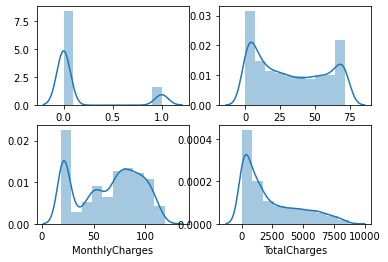

In [14]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
num_cols
n=1
for col in num_cols:
    plt.subplot(2,2,n)
    sns.distplot(df[col], bins=10, kde=True)
    n=n+1

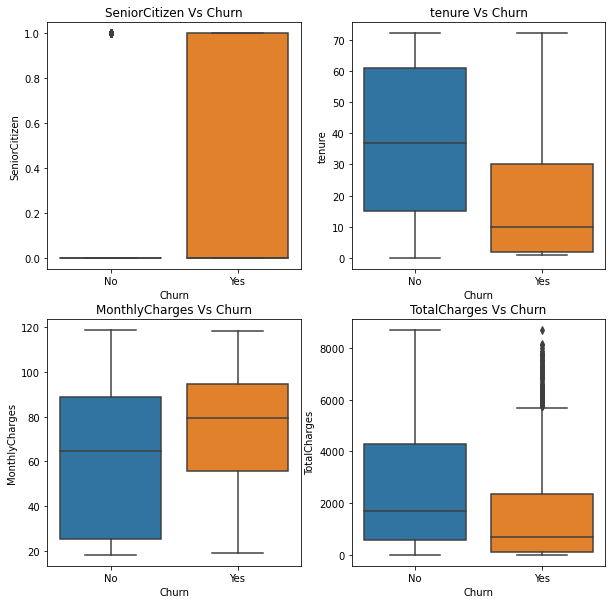

In [15]:
plt.figure(figsize=(10,10))
n=1
for col in num_cols:
    plt.subplot(2, 2, n)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(col+' Vs Churn')
    n=n+1

In [16]:
char_columns = df.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
char_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7010-BRBUU,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No
1,9688-YGXVR,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
2,9286-DOJGF,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
3,6994-KERXL,Male,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
4,2181-UAESM,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
5982,5982-PSMKW,Female,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),No
5983,8044-BGWPI,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,No
5984,7450-NWRTR,Male,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes


In [17]:
char_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5986 non-null   object
 1   gender            5986 non-null   object
 2   Partner           5986 non-null   object
 3   Dependents        5986 non-null   object
 4   PhoneService      5986 non-null   object
 5   MultipleLines     5986 non-null   object
 6   InternetService   5986 non-null   object
 7   OnlineSecurity    5986 non-null   object
 8   OnlineBackup      5986 non-null   object
 9   DeviceProtection  5986 non-null   object
 10  TechSupport       5986 non-null   object
 11  StreamingTV       5986 non-null   object
 12  StreamingMovies   5986 non-null   object
 13  Contract          5986 non-null   object
 14  PaperlessBilling  5986 non-null   object
 15  PaymentMethod     5986 non-null   object
 16  Churn             5986 non-null   object
dtypes: object(17)


In [18]:
# plt.figure(figsize=(20,40))
# # fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# # fig.add_axes([0, 0, 1, 1])
# z=1
# for col in char_columns.columns:
#     plt.subplot(8,2,z)
#     sns.countplot(x='Churn', hue=col, data=df)
#     z=z+1

- convert all features into vectors(label encoder)
- split it into train test
- train a simple logistic regression

In [19]:
le = LabelEncoder()
# le.fit(char_columns.columns)
# list(le.classes_)
le_data = char_columns.apply(le.fit_transform)
le_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,4252,1,1,1,1,2,2,1,1,1,1,1,1,2,0,1,0
1,5806,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1,0
2,5577,0,1,0,1,2,1,0,0,0,0,0,0,0,1,0,1
3,4243,1,0,0,1,0,0,0,0,0,0,0,2,0,1,2,0
4,1270,1,0,0,1,0,0,2,0,2,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,402,1,1,0,1,0,1,2,0,0,0,2,2,0,1,2,1
5982,3616,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,0
5983,4858,1,1,1,1,0,2,1,1,1,1,1,1,0,1,2,0
5984,4499,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1


In [20]:
vector_data = le_data.join(df[num_cols])
vector_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,4252,1,1,1,1,2,2,1,1,1,...,1,1,2,0,1,0,0,72,24.10,1734.65
1,5806,0,0,0,1,0,1,0,2,2,...,2,0,0,1,1,0,0,44,88.15,3973.20
2,5577,0,1,0,1,2,1,0,0,0,...,0,0,0,1,0,1,1,38,74.95,2869.85
3,4243,1,0,0,1,0,0,0,0,0,...,0,2,0,1,2,0,0,4,55.90,238.50
4,1270,1,0,0,1,0,0,2,0,2,...,0,0,0,0,2,0,0,2,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,402,1,1,0,1,0,1,2,0,0,...,2,2,0,1,2,1,0,1,95.00,95.00
5982,3616,0,1,1,1,2,0,2,2,2,...,2,2,2,1,1,0,0,23,91.10,2198.30
5983,4858,1,1,1,1,0,2,1,1,1,...,1,1,0,1,2,0,0,12,21.15,306.05
5984,4499,1,0,0,1,2,1,0,0,2,...,2,2,0,1,2,1,1,12,99.45,1200.15


In [21]:
x_data = vector_data.drop(['customerID', 'Churn'], axis=1)
y_data = vector_data['Churn']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2)
print(x_training_data)
print(x_test_data)
print(y_training_data)
print(y_test_data)

      gender  Partner  Dependents  PhoneService  MultipleLines  \
1870       1        0           0             1              2   
1975       1        1           0             1              2   
1513       0        0           0             1              2   
666        0        1           0             0              1   
980        1        0           0             1              0   
...      ...      ...         ...           ...            ...   
3490       1        0           0             1              2   
5405       1        1           1             1              2   
3640       0        0           0             1              2   
2558       1        0           0             1              0   
2630       0        0           0             0              1   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
1870                1               0             2                 0   
1975                0               0             2          

In [22]:
# Training the Logistic Regression Model

model = LogisticRegression()
model.fit(x_training_data, y_training_data)

C:\Users\opa\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Make predictions with Logistic Regresssion

predictions = model.predict(x_test_data)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
# Measure performance of Logistic Regression Model

performance_Logistic_Regression = classification_report(y_test_data, predictions)
print(performance_Logistic_Regression)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       870
           1       0.63      0.55      0.59       328

    accuracy                           0.79      1198
   macro avg       0.73      0.71      0.72      1198
weighted avg       0.78      0.79      0.78      1198



In [25]:
#Generate a confusion matrix, accuracy_score

print(confusion_matrix(y_test_data, predictions))
print(accuracy_score(y_test_data, predictions))

[[763 107]
 [147 181]]
0.7879799666110183


In [26]:
#Random Forest Classifier

classifier = RandomForestClassifier(n_estimators=1000, criterion="entropy", random_state=0)
classifier.fit(x_training_data, y_training_data)
print(classifier.predict(x_test_data))
pred = classifier.predict(x_test_data)
performance_Random_Forest = classification_report(y_test_data, pred)
print(performance_Random_Forest)

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       870
           1       0.65      0.48      0.56       328

    accuracy                           0.79      1198
   macro avg       0.74      0.69      0.71      1198
weighted avg       0.78      0.79      0.78      1198



In [27]:
# Naive Bayes Algorithm

classifier_2 = GaussianNB()
classifier_2.fit(x_training_data, y_training_data)
print(classifier_2.predict(x_test_data))
pred = classifier_2.predict(x_test_data)
performance_Naive_Bayes = classification_report(y_test_data, pred)
print(performance_Naive_Bayes)

[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       870
           1       0.49      0.71      0.58       328

    accuracy                           0.72      1198
   macro avg       0.68      0.72      0.69      1198
weighted avg       0.77      0.72      0.73      1198



In [28]:
# KNN Algorithm

classifier_3 = KNeighborsClassifier(n_neighbors=5)
classifier_3.fit(x_training_data, y_training_data)
print(classifier_3.predict(x_test_data))
pred = classifier_3.predict(x_test_data)
performance_KNN = classification_report(y_test_data, pred)
print(performance_KNN)

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       870
           1       0.55      0.43      0.48       328

    accuracy                           0.75      1198
   macro avg       0.68      0.65      0.66      1198
weighted avg       0.73      0.75      0.74      1198



C:\Users\opa\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\opa\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.798366 (0.017637)
LDA: 0.794856 (0.014917)
KNN: 0.761777 (0.013220)
DTC: 0.731543 (0.017746)
NB: 0.749246 (0.011232)
SVM: 0.734890 (0.018765)


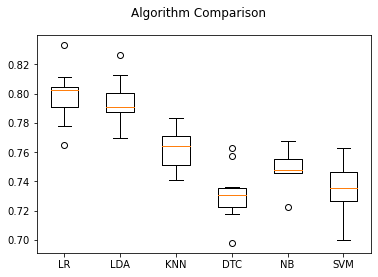

In [29]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = model_selection.cross_val_score(model, x_data, y_data, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It seems Logistic Regression and SVM both has maximum accuracy level closely related. We can treat both Logistic Regression amd SVM as the best fitted model. But seeing the above plot it can be determined that the LR is with skewness whereas the SVM seems more close to normal distrbution. In this case SVM can be taken into account as the best fitted model.

# SUMMARY
## About Project:
    The dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

## Motive:
    The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:
    . Description of the data (with the calculation of basic statistics);
    . Research of dependencies and formulation of hypotheses;
    . Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
    . Comparison of the quality of the obtained models.
   
## Analysis Done:
    Performed data cleaning. Analysed the numerical columns of the dataset with respect to churn.

## Balance of Training Data:
    For balancing the training data, converted the categorical data into vector using Label Encoder and confirmed the equal distribution of data. Split data into training and test data set. As per the size of the data 20% of the data has been considered for the test data set.

## Feature Engineering:
    Performed Box plot analysis to predict the churn of users with respect to other data columns.
    Performed Label Encoder operation to convert all the features into vector form.

## Models experimented:
    LogisticRegression, LinearDiscriminantAnalysis, KNN, DecisionTreeClassifier, Naive Baiye's and SVM.
    SVM has the highest accuracy with normally distributed data and can be treated as the best fitted model.